In [3]:
pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp311-cp311-macosx_11_0_arm64.whl size=247957 sha256=0d96a6358b38d5234f007558ef3f8c0b1b60f2560cb2cd706eae8c9458d5dc58
  Stored in directory: /Users/bltzkrg/Library/Caches/pip/wheels/17/cd/ed/2d49e9bac69cf09382e4c7cc20a2511202b48324b87db26019
Successfully built mysql-connector
Note: you may need to restart the kernel to use updated packages.


In [4]:
import mysql.connector

### Creando una conexión a la DB

Conexión al servidor

In [5]:
mydb = mysql.connector.connect(
                            host = "localhost",
                            user = "root",
                            passwd = ""
                            )

Conexión a una base de datos

In [7]:
mydb = mysql.connector.connect(
                            host = "localhost",
                            user = "root",
                            passwd = "",
                            database = "test"
                            )

### Creando el puntero para las operaciones que implquen conexión con la DB

In [8]:
mycursor = mydb.cursor()

### Creando una base de datos

In [9]:
mycursor.execute('CREATE DATABASE python_sql')

### Vericar que bases de datos existen en mi servidor

In [10]:
mycursor.execute('SHOW DATABASES')

In [11]:
for db in mycursor:
    print(db)

('SQL_prueba',)
('information_schema',)
('mysql',)
('new_prueba',)
('performance_schema',)
('phpmyadmin',)
('python_sql',)
('test',)


### Conectando a la DB 'python_sql'

In [12]:
mydb = mysql.connector.connect(
                            host = "localhost",
                            user = "root",
                            passwd = "",
                            database = "python_sql"
                            )

In [13]:
mycursor = mydb.cursor()

### Creando una tabla en la DB `python_sql`

In [14]:
mycursor.execute('CREATE TABLE python_course (fname VARCHAR(50),lname VARCHAR(50), score INT)')

### Creando una tabla con Clave primaria

In [15]:
mycursor.execute('CREATE TABLE python_primary (id INT AUTO_INCREMENT PRIMARY KEY, fname VARCHAR(50),lname VARCHAR(50), score INT)')

### Agregar una clave primaria a una tabla ya existente

In [17]:
mycursor.execute('ALTER TABLE python_course ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY')

### Verificando cuantas tablas existen en mi DB

In [18]:
mycursor.execute('SHOW TABLES')

In [19]:
for table in mycursor:
    print(table)

('python_course',)
('python_primary',)


### Agregar un registro a la tabla

In [20]:
mycursor.execute('INSERT INTO python_course (fname, lname, score) VALUES(%s,%s, %s)',
                ('john', 'Doe', 100)
                )
mydb.commit()

print(mycursor.rowcount, 'Registro insertado')

1 Registro insertado


In [21]:
sql = 'INSERT INTO python_course (fname, lname, score) VALUES(%s,%s, %s)'
val = ('Nasna', 'Doe', 100)

mycursor.execute(sql,val)

mydb.commit()

print(mycursor.rowcount, 'Registro insertado')

1 Registro insertado


### Agregar varios registros

In [22]:
sql = 'INSERT INTO python_course (fname, lname, score) VALUES(%s,%s, %s)'
val = [('Nasna', 'Doe', 100),('john', 'Doe', 100)]

mycursor.executemany(sql,val)

mydb.commit()

print(mycursor.rowcount, 'Registros insertados')

2 Registro insertado


In [23]:
sql = 'INSERT INTO python_course (fname, lname, score) VALUES(%s,%s, %s)'
val = [
    ('John', 'Doe', 85),
    ('Jane', 'Smith', 92),
    ('Robert', 'Johnson', 78),
    ('Susan', 'Williams', 95),
    ('Michael', 'Brown', 88),
    ('Emily', 'Jones', 91),
    ('William', 'Davis', 77),
    ('Jennifer', 'Taylor', 89),
    ('James', 'Martinez', 83),
    ('Sarah', 'Miller', 94),
    ('David', 'Garcia', 86),
    ('Mary', 'White', 90),
    ('Matthew', 'Anderson', 79),
    ('Linda', 'Jackson', 93),
    ('Christopher', 'Harris', 82),
    ('Karen', 'Lee', 87),
    ('Joseph', 'Thompson', 80),
    ('Patricia', 'Hall', 96),
    ('Daniel', 'Scott', 75),
    ('Nancy', 'Moore', 97)
]


mycursor.executemany(sql,val)

mydb.commit()

print(mycursor.rowcount, 'Registros insertados')

20 Registro insertado


## Nota: los registro deben de ser tuplas!!!

### Seleccionar todos los lementos de una tabla

In [26]:
mycursor.execute('SELECT * FROM python_course')

InternalError: Unread result found

In [27]:
myresult = mycursor.fetchall()

In [28]:
for reg in myresult:
    print(reg)

('john', 'Doe', 100, 1)
('Nasna', 'Doe', 100, 2)
('Nasna', 'Doe', 100, 3)
('john', 'Doe', 100, 4)
('John', 'Doe', 85, 5)
('Jane', 'Smith', 92, 6)
('Robert', 'Johnson', 78, 7)
('Susan', 'Williams', 95, 8)
('Michael', 'Brown', 88, 9)
('Emily', 'Jones', 91, 10)
('William', 'Davis', 77, 11)
('Jennifer', 'Taylor', 89, 12)
('James', 'Martinez', 83, 13)
('Sarah', 'Miller', 94, 14)
('David', 'Garcia', 86, 15)
('Mary', 'White', 90, 16)
('Matthew', 'Anderson', 79, 17)
('Linda', 'Jackson', 93, 18)
('Christopher', 'Harris', 82, 19)
('Karen', 'Lee', 87, 20)
('Joseph', 'Thompson', 80, 21)
('Patricia', 'Hall', 96, 22)
('Daniel', 'Scott', 75, 23)
('Nancy', 'Moore', 97, 24)


### Seleccionar Elementos de una columna 

In [29]:
mycursor.execute('SELECT lname FROM python_course')

myresult = mycursor.fetchall()
for reg in myresult:
    print(reg)

('Doe',)
('Doe',)
('Doe',)
('Doe',)
('Doe',)
('Smith',)
('Johnson',)
('Williams',)
('Brown',)
('Jones',)
('Davis',)
('Taylor',)
('Martinez',)
('Miller',)
('Garcia',)
('White',)
('Anderson',)
('Jackson',)
('Harris',)
('Lee',)
('Thompson',)
('Hall',)
('Scott',)
('Moore',)


In [30]:
mycursor.execute('SELECT fname FROM python_course')

myresult = mycursor.fetchall()
for reg in myresult:
    print(reg)

('john',)
('Nasna',)
('Nasna',)
('john',)
('John',)
('Jane',)
('Robert',)
('Susan',)
('Michael',)
('Emily',)
('William',)
('Jennifer',)
('James',)
('Sarah',)
('David',)
('Mary',)
('Matthew',)
('Linda',)
('Christopher',)
('Karen',)
('Joseph',)
('Patricia',)
('Daniel',)
('Nancy',)


In [31]:
mycursor.execute('SELECT lname, score FROM python_course')

myresult = mycursor.fetchall()
for reg in myresult:
    print(reg)

('Doe', 100)
('Doe', 100)
('Doe', 100)
('Doe', 100)
('Doe', 85)
('Smith', 92)
('Johnson', 78)
('Williams', 95)
('Brown', 88)
('Jones', 91)
('Davis', 77)
('Taylor', 89)
('Martinez', 83)
('Miller', 94)
('Garcia', 86)
('White', 90)
('Anderson', 79)
('Jackson', 93)
('Harris', 82)
('Lee', 87)
('Thompson', 80)
('Hall', 96)
('Scott', 75)
('Moore', 97)


In [32]:
mycursor.execute('SELECT fname FROM python_course')

myresult = mycursor.fetchall()
for reg in myresult:
    print(reg)

('john',)
('Nasna',)
('Nasna',)
('john',)
('John',)
('Jane',)
('Robert',)
('Susan',)
('Michael',)
('Emily',)
('William',)
('Jennifer',)
('James',)
('Sarah',)
('David',)
('Mary',)
('Matthew',)
('Linda',)
('Christopher',)
('Karen',)
('Joseph',)
('Patricia',)
('Daniel',)
('Nancy',)


In [64]:
mydb = mysql.connector.connect(
                            host = "localhost",
                            user = "root",
                            passwd = "",
                            database = "python_sql"
                            )

In [65]:
mycursor = mydb.cursor()

In [66]:
mycursor.execute('SHOW TABLES')

for it in mycursor:
    print(it)

('python_course',)
('python_primary',)


In [67]:
mycursor.execute('SELECT lname FROM python_course')

myresult = mycursor.fetchone()
for reg in myresult:
    print(reg)

Doe


In [68]:
mycursor.execute('SELECT score FROM python_course WHERE score > 5')

myresult = mycursor.fetchall()

axis_x= []

for reg in myresult:
    axis_x.append(reg)

InternalError: Unread result found

In [69]:
mycursor.execute('SELECT score FROM python_course WHERE score > 5')

myresult = mycursor.fetchall()

axis_y= []

for reg in myresult:
    axis_y.append(reg)

InternalError: Unread result found

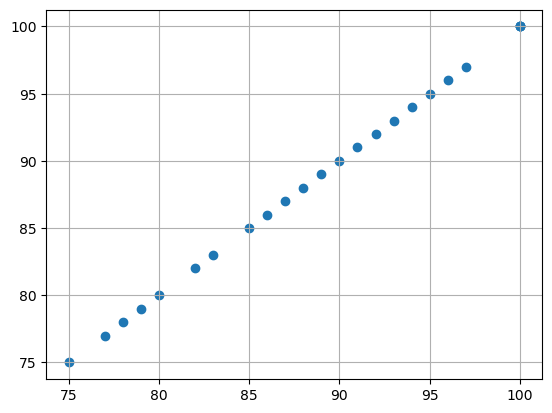

In [63]:
import matplotlib.pyplot as plt

plt.scatter (axis_x, axis_y)
plt.grid()